In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity
from IPython.display import clear_output

def imshow(title="Image", image=None, size=10):
    w,h=image.shape[0], image.shape[1]
    aspect_r=w/h
    plt.figure(figsize=(size*aspect_r,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

clear_output(wait=False)

(-0.5, 1279.5, 959.5, -0.5)

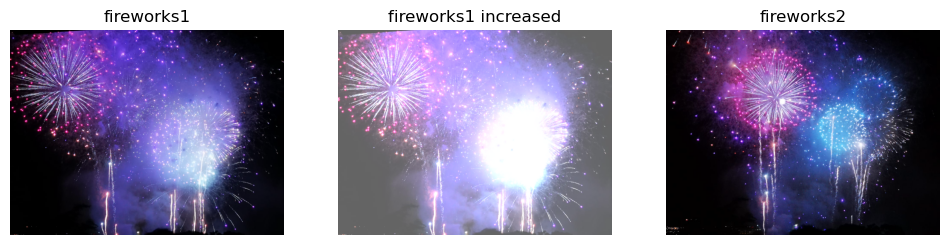

In [12]:
#let's compare images similarity using the mean squared error first

def mse(img1, img2):
    error = np.sum((img1.astype("float") - img2.astype("float")) **2)
    error /= float(img1.shape[0]-img1.shape[1])

    return error

fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')
M = np.ones(fireworks1.shape, dtype = "uint8") * 100 
fireworks1b = cv2.add(fireworks1, M)

fig, ax = plt.subplots(1,3,figsize=(12, 6))

ax[0].imshow(fireworks1)
ax[0].set_title('fireworks1')
ax[0].axis('off')

ax[1].imshow(fireworks1b)
ax[1].set_title('fireworks1 increased')
ax[1].axis('off')

ax[2].imshow(fireworks2)
ax[2].set_title('fireworks2')
ax[2].axis('off')

In [13]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [14]:
#if they are the same, mse=0 and ss=1.0 : 

compare(fireworks1, fireworks1)

MSE = -0.00
SS = 1.00


In [15]:
compare(fireworks1, fireworks2)

MSE = -8161585.43
SS = 0.48


In [16]:
compare(fireworks1, fireworks1b)

MSE = -33828034.16
SS = 0.52
